In [9]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(1234)
import matplotlib.pyplot as plt

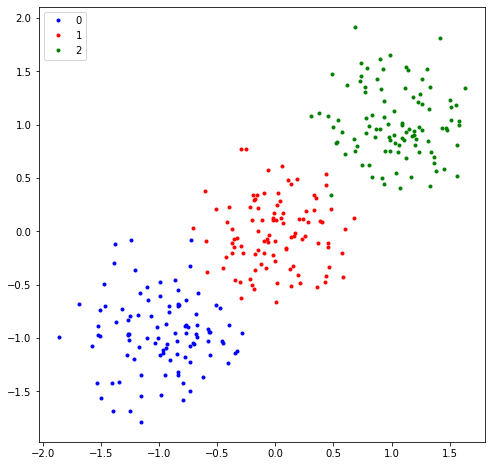

In [10]:
m0,m1,m2 = [-1,-1],[0,0],[1,1]
spred = 0.1
cov = np.eye(2) * spred
x1 = rng.multivariate_normal(m0,cov,100)
x2 = rng.multivariate_normal(m1,cov,100)
x3 = rng.multivariate_normal(m2,cov,100)

plt.figure(figsize=(8,8))
plt.plot(x1[:,0],x1[:,1],'.b',label='0')
plt.plot(x2[:,0],x2[:,1],'.r',label='1')
plt.plot(x3[:,0],x3[:,1],'.g',label='2')
plt.legend()
X = np.row_stack((x1,x2,x3))
y = np.concatenate((np.zeros(x1.shape[0]),np.ones(x1.shape[0]),np.ones(x3.shape[0])*2))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [3]:
y = np.array([1,2,3,3,1,2,3,1,1,1,2,3])

In [5]:
np.unique(y,return_counts=True)

(array([1, 2, 3]), array([5, 3, 4], dtype=int64))

- n_classes = 3

- n_features = 2

- n_samples = 240

- mean vector = n_classes x n_features

$$
\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \frac {-(x - \mu)^2}{2 \sigma^2} 
$$

$$

$$

In [15]:
def logofNormal(x,mean,variance):
    # X is of shape n_samples X n_features 
    out = -0.5*(np.log(2*np.pi) + np.log(variance))
    exp = -0.5*(((x - mean)**2)/variance)
    
    return np.sum(exp + out,axis = 1)

class GaussainNB():
    def __init__(self):
        self.means = None
        self.vars = None
        self.priors = None
        self.n_classes = None
    def fit(self,X:np.ndarray,y:np.ndarray):
        n_samples,n_features = X.shape
        _,class_counts   = np.unique(y,return_counts=True)
        self.mean = np.zeros((n_classes,n_features),dtype = np.float64)
        self.vars = np.zeros((n_classes,n_features),dtype = np.float64)
        self.n_classes = len(class_counts)
        print(class_counts)
        #priors calculation : Occurence of each class/Total countof each class
        # For example the prior of class one is the number of occurence of class 1 in the label vector divide by the 
        # total number of observations in the label vector
        
        self.priors = class_counts/np.sum(class_counts)
        for c in range(n_classes):
            #Gives all the examples of X  for which y belongs to c
            X_c = X[y==c] 
            self.means[c] = X_c.mean(axis = 0)
            self.vars[c] = X_c.var(axis = 0)
    
    def predict(self,X):
        n_samples,_ = X.shape
        posterior = np.zeros((n_samples,self.n_classes),dtype = np.float64)
        for c in range(self.n_classes):
            posterior[:,c] = np.log(self.priors[c]) + logofNormal(X,self.means[c],self.vars[c])
            
        return posterior.argmax(axis = 1)
    
        
        
    
gnb = GaussainNB()
gnb.fit(X_train,y_train)
gnb.priors

[80 80 80]


array([0.33333333, 0.33333333, 0.33333333])